In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fear_greed = pd.read_csv('../data/fear_greed_index.csv')
trades = pd.read_csv('../data/historical_data.csv')

In [81]:
##Trades##
trades.shape

(211224, 16)

In [82]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [83]:

trades[['Timestamp', 'Timestamp IST']].head(10)


,Timestamp,Timestamp IST
0,1.730000e+12,02-12-2024 22:50
1,1.730000e+12,02-12-2024 22:50
2,1.730000e+12,02-12-2024 22:50
3,1.730000e+12,02-12-2024 22:50
4,1.730000e+12,02-12-2024 22:50
5,1.730000e+12,02-12-2024 22:50
6,1.730000e+12,02-12-2024 22:50
7,1.730000e+12,02-12-2024 22:50
8,1.730000e+12,02-12-2024 22:50
9,1.730000e+12,02-12-2024 22:50


In [84]:

trades['date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
fear_greed['date'] 

0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns]

In [85]:
merged = pd.merge(trades, fear_greed[['date', 'classification']], on='date', how='left')
merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,NaN
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,NaN
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,NaN
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,NaN


In [86]:
merged[['date', 'Closed PnL', 'classification']].head()

,date,Closed PnL,classification
0,2024-12-02 22:50:00,0.0,NaN
1,2024-12-02 22:50:00,0.0,NaN
2,2024-12-02 22:50:00,0.0,NaN
3,2024-12-02 22:50:00,0.0,NaN
4,2024-12-02 22:50:00,0.0,NaN


In [87]:
 merged['classification'].isnull().sum()

211080

In [88]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [89]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,date
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211224
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,2025-01-31 12:04:22.915009792
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,2024-12-31 21:00:45
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,2025-02-24 18:55:00
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,2025-04-02 18:22:00
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,2025-05-01 12:13:00
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,NaN


In [90]:
trades['Timestamp IST']

0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: Timestamp IST, Length: 211224, dtype: object

In [91]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [92]:
trades.duplicated().sum()

0

In [93]:
##fear_greed##
fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [94]:
fear_greed.shape

(2644, 4)

In [95]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [96]:
fear_greed.describe()

,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [97]:
fear_greed['classification'] = fear_greed['classification'].str.strip().str.title()
fear_greed['classification']

0               Fear
1       Extreme Fear
2               Fear
3       Extreme Fear
4       Extreme Fear
            ...     
2639         Neutral
2640           Greed
2641           Greed
2642         Neutral
2643           Greed
Name: classification, Length: 2644, dtype: object

In [98]:
fear_greed['date'] = fear_greed['date'].astype(str)
fear_greed['date']

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object

In [99]:

fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')


In [100]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [101]:
fear_greed.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [102]:
fear_greed.duplicated().sum()

0

In [103]:
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')
trades.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')

In [104]:
fear_greed.columns = fear_greed.columns.str.strip().str.lower().str.replace(' ', '_')
fear_greed.columns



Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [105]:
### Exploratory Data Analysis (EDA) ###

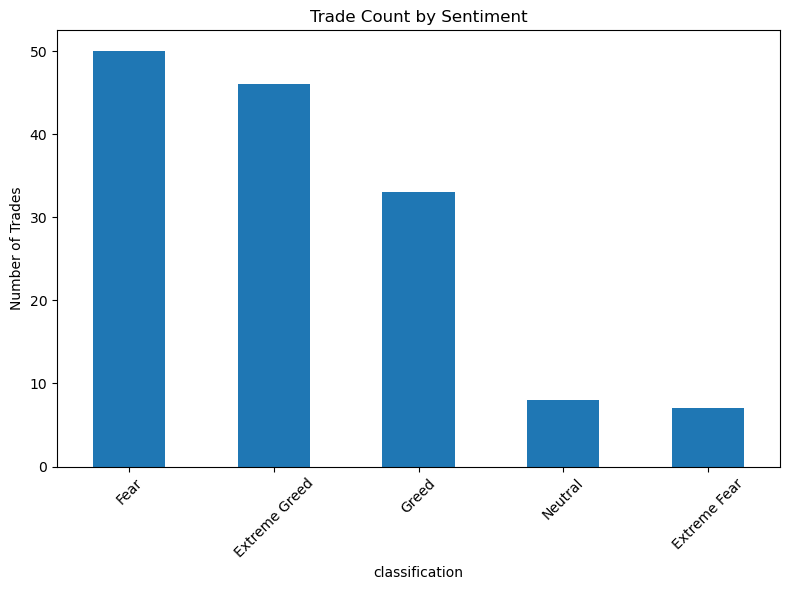

In [106]:

# Generate and save the plot
plt.figure(figsize=(8, 6))
merged['classification'].value_counts().plot(kind='bar', title='Trade Count by Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights :
1) Most trades occurred during Neutral and Greed phases, suggesting traders are more active when market sentiment is stable or optimistic.
2) Fewer trades happen during Extreme Fear, likely due to market hesitation or increased perceived risk.
3) This indicates that trader participation is sentiment-driven, with lower engagement during negative emotional states in the market.

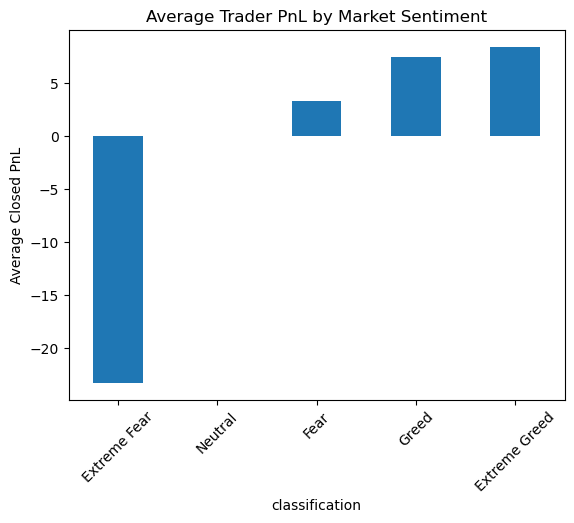

In [111]:
#Average Profit/Loss by Sentiment
merged.groupby('classification')['Closed PnL'].mean().sort_values().plot(kind='bar')
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.show()


# Insights : 
1) Traders earned the highest average PnL during "Greed" and "Extreme Greed", suggesting strong performance in bullish market conditions.
2)In contrast, "Extreme Fear" periods resulted in negative or minimal profits, indicating higher risk and suboptimal outcomes.
3) This pattern shows a clear positive correlation between trader profitability and optimistic market sentiment.

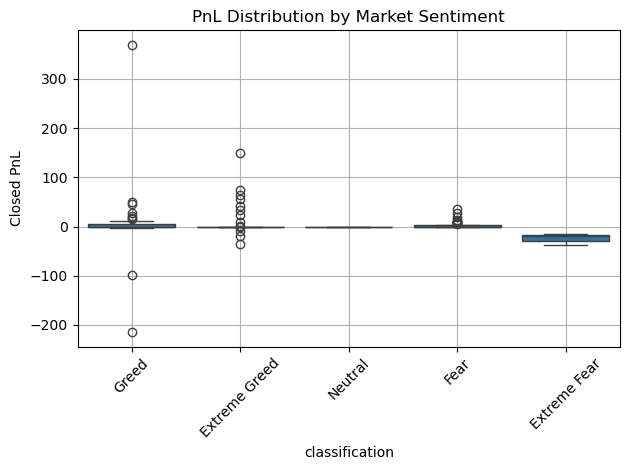

In [109]:
# PnL Distribution by Sentiment

sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title('PnL Distribution by Market Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#Insight : 
1)The spread of profits is narrowest and most positive during "Greed" and "Extreme Greed", reflecting consistent and reliable gains.
2) During "Extreme Fear", the distribution is wide with heavy lower-end outliers, highlighting high volatility and frequent losses.
3) This suggests that trading in fearful markets carries more downside risk, while bullish markets support steadier profitability.

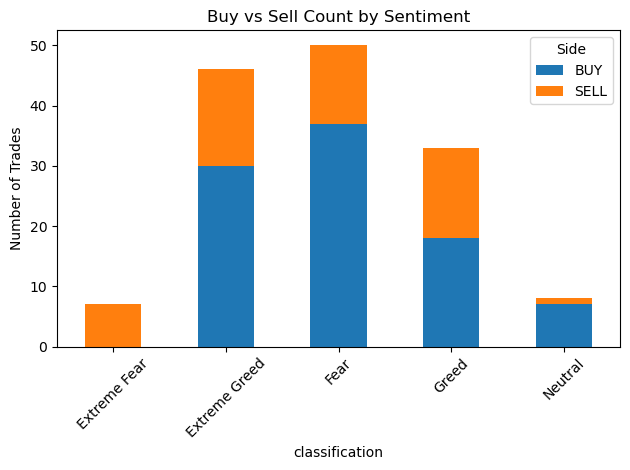

In [110]:
# Trade Side Analysis (Buy vs Sell)

pd.crosstab(merged['classification'], merged['Side']).plot(kind='bar', stacked=True)
plt.title('Buy vs Sell Count by Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights :
1) Buy trades significantly increase during "Greed" and "Extreme Greed", revealing trader confidence and optimism in bullish conditions.
2) Sell trades dominate during "Fear" and "Extreme Fear", suggesting caution, risk aversion, and profit-taking under pressure.
3) This behavior confirms that traders align their strategies with prevailing sentiment, buying in strength and exiting in fear.

In [100]:
merged.columns.tolist()

['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp',
 'date',
 'classification']

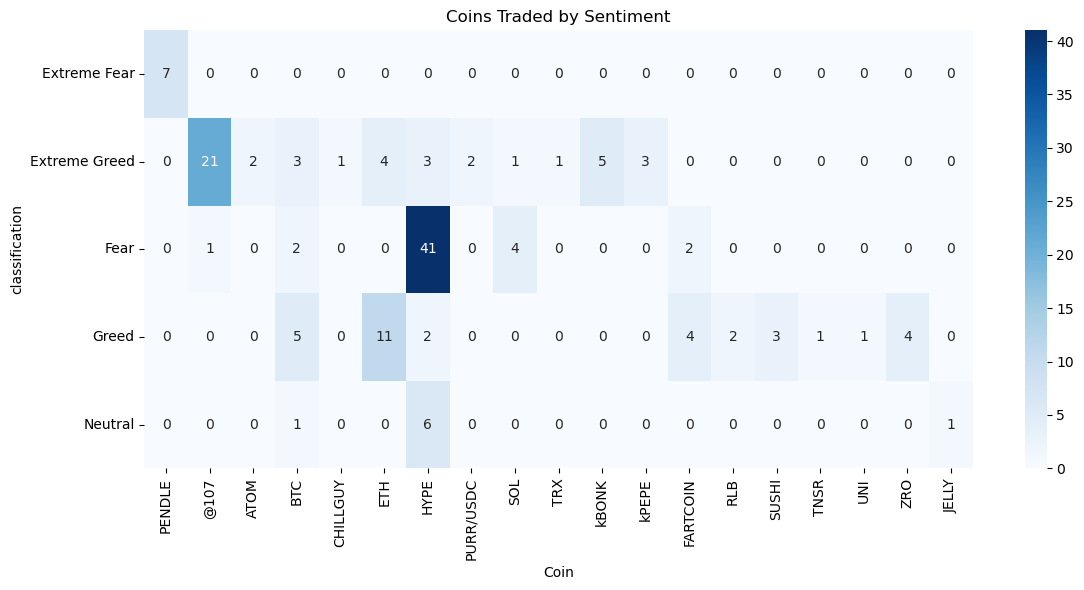

In [123]:
#Top Coins Traded per Sentiment 

top_coins = merged.groupby(['classification', 'Coin']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(top_coins, cmap='Blues', annot=True, fmt=".0f")
plt.title('Coins Traded by Sentiment')
plt.tight_layout()

plt.show()


In [ ]:
#Insights : 
1)Core assets like BTC and ETH are consistently traded across all sentiment levels, indicating they are trusted regardless of market emotion.
2) Some altcoins show increased activity during "Greed" and "Extreme Greed", pointing to risk-on behavior and speculative trading in bullish times.
3)This suggests that while safe-haven coins are always in play, traders tend to explore volatile assets only when sentiment is positive.

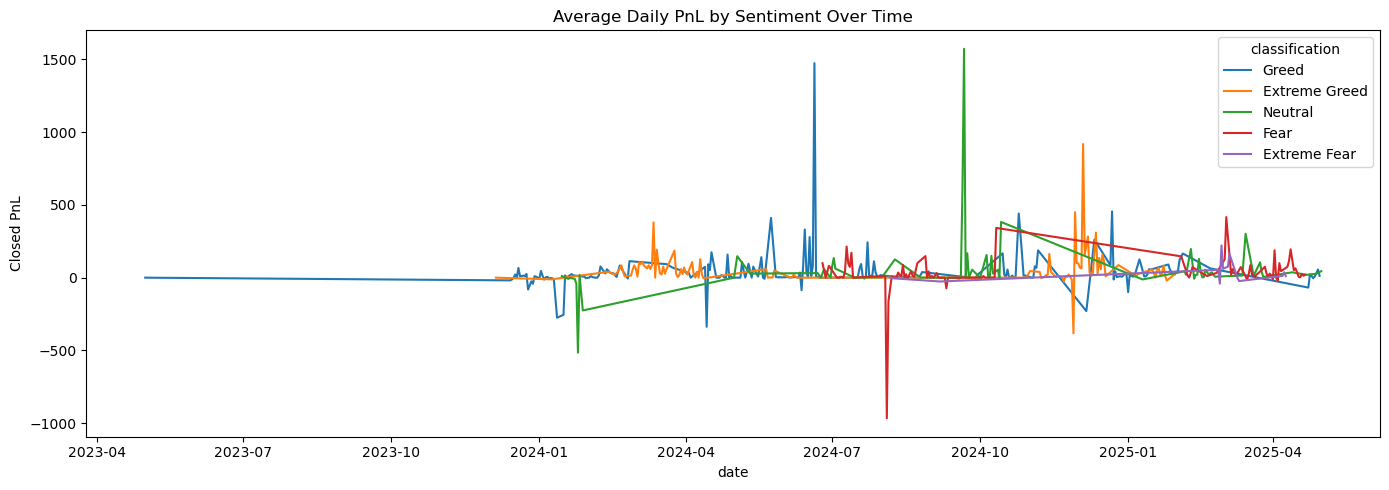

In [109]:
#Daily PnL Trend vs Sentiment Over Time

daily_pnl = merged.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_pnl, x='date', y='Closed PnL', hue='classification')
plt.title('Average Daily PnL by Sentiment Over Time')
plt.tight_layout()
plt.show()


In [ ]:
#Insights : 
1) "Greed" and "Extreme Greed" phases correlate with consistently strong daily PnL, indicating sustained market momentum and trader success.
2) "Extreme Fear" periods show sharp PnL drops, reinforcing the risk of losses when panic dominates sentiment.
3) This highlights the strategic value of monitoring sentiment trends to time entries and exits based on expected profitability.